In [1]:
# !gdown https://drive.google.com/u/0/uc?id=1O4YR4UBatOLnaP4gMHbmFw7UJvhhxFwq&export=download

In [2]:
# !gdown https://drive.google.com/u/0/uc?id=1-7aMdKW4KcCKLwoUKC3XxdIwfIKkzwx6&export=download

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/Ds2/test_data.zip
!unzip /content/drive/MyDrive/Ds2/train_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_data/10/fac187c69fc74a48d28e626bd17fe5b0d36db1e6_1618836534.jpg  
  inflating: train_data/10/9a9f9ff4d3dcfc88e6b9209178d4ee791142fdaa_1618725283.jpg  
  inflating: train_data/10/958281d27ab722113c92180afe17db62bfb6a5d0_1623743398.jpg  
  inflating: train_data/10/8a94fada61bcb6dda8983dc36ddf2ec5d32cbf9f_1629199040.jpg  
  inflating: train_data/10/d72c1b799a927514b1fd81d9ee93208734be4d61_1613975034.jpg  
  inflating: train_data/10/6550a6492a93a9542b7757c898369f7996bb62b7_1613978514.jpg  
  inflating: train_data/10/3465c07dc8a3521f0303cec03ebbc4ac2d738317_1630174913.jpg  
  inflating: train_data/10/74a657eb2f8bc1a9bcd42fee32d04b1a400fcddf_1627746721.jpg  
  inflating: train_data/10/387c4a5ef5d37c263ebe457a2aab08890da843ca_1620800188.jpg  
  inflating: train_data/10/01330eb299562e0e10bdc560e7ed12754f49703b_1621081068.jpg  
  inflating: train_data/10/1ea75672aea3496a099cc3c8d8e2c01306456a52_1619644153.jpg  
  inflating: t

In [5]:
train_dir = '/content/train_data'
test_dir = '/content/test_data'

In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg


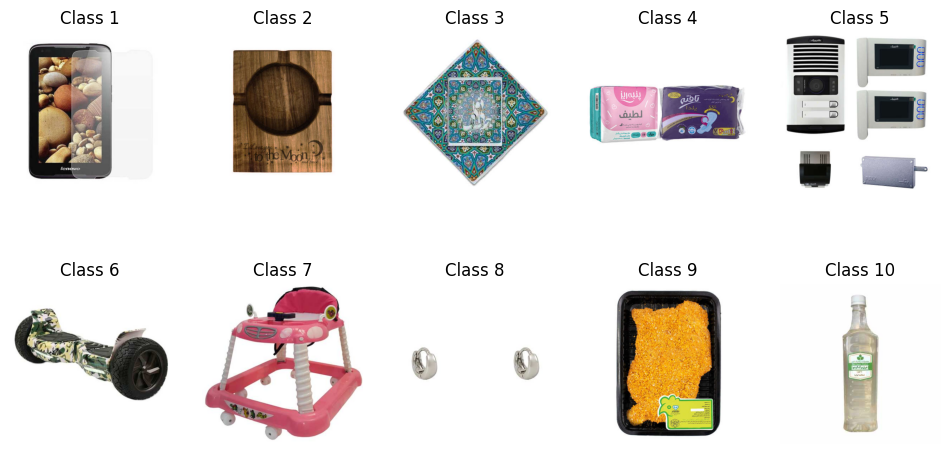

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
n = np.random.randint(0,400)
for i in range(1, 11):
    subdir = os.path.join(train_dir, str(i))
    pic_files = [f for f in os.listdir(subdir) if f.endswith('.jpg')]
    if pic_files:
        img = mpimg.imread(os.path.join(subdir, pic_files[n]))
        ax = axes[i - 1]
        ax.imshow(img)
        ax.set_title(f'Class {i}')
        ax.axis('off')

In [8]:
print(img.shape)

(456, 456, 3)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.applications.resnet import preprocess_input
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=False,
    fill_mode='nearest',
    validation_split=0.3,
    preprocessing_function = preprocess_input

)

In [10]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(456, 456),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(456, 456),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

Found 6994 images belonging to 10 classes.
Found 2996 images belonging to 10 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [12]:
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(456, 456, 3))
for layer in base_model.layers:
    layer.trainable = False

234698864/234698864 [==============================] - 12s 0us/step


In [13]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(
    train_generator,
    batch_size=32,
    epochs=10,
    validation_data=validation_generator,
    )

Epoch 1/10
219/219 [==============================] - 654s 3s/step - loss: 1.4508 - accuracy: 0.5140 - val_loss: 1.3216 - val_accuracy: 0.5567
Epoch 2/10
219/219 [==============================] - 632s 3s/step - loss: 1.1713 - accuracy: 0.6128 - val_loss: 1.2568 - val_accuracy: 0.5761
Epoch 3/10
219/219 [==============================] - 631s 3s/step - loss: 1.0282 - accuracy: 0.6538 - val_loss: 1.2874 - val_accuracy: 0.5564
Epoch 4/10
  7/219 [..............................] - ETA: 6:57 - loss: 0.7925 - accuracy: 0.7589

KeyboardInterrupt: ignored

In [16]:
model.save("Model-30/10.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:

model.save("Model-30/10.keras")

In [ ]:
a = '/content/Model-30'
